### Student Information
Name: 余承祐

Student ID: 111062233

GitHub ID: OmeiLab

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [40]:
### Begin Assignment Here
# import necessary dataset
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px

nltk.download('punkt')
nltk.download('stopwords')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Data Preparation

In [2]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df.head()	# check the top 5 rows of the dataset

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


Let's generate a new dataset by removing some redundant columns. We will preserve these:
- `type`
  
- `subreddit`
- `title`
- `upvotes`
- `downvotes`
- `upvote_ratio`
- `text`
- `subjectivity`
- `polarity`
- `sentiment`
- `entities`
- `label`

These columns are just chosen by my intuition, that is, some columns will not be used then or even be dropped during the further analysis. 

In [3]:
data = df[['type', 'subreddit', 'title', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']]
data.head()

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,StockMarket,How do you feel about a sitting president maki...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [4]:
# check the shape
# 847 rows and 12 columns
data.shape

(847, 12)

## Data Cleaning

Let's deal with the missing values first.

In [5]:
# check for missing values
data.isnull().sum()

type              0
subreddit         0
title             0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

Note that 783 / 847 = 0.924, imples that **92.4% of the data is missing** which is such a large percentage that it may indicate that the data is not suitable for analysis. For simply, I'll just drop them.

In [6]:
# drop columns "downvotes" and "upvote_ratio" 
data.drop(columns = ['downvotes', 'upvote_ratio'], axis=1, inplace=True)
data.shape

C:\Users\user\AppData\Local\Temp\ipykernel_15948\2042415421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['downvotes', 'upvote_ratio'], axis=1, inplace=True)


(847, 10)

Now let's check if there are duplicate data.

In [7]:
# check duplicate
print(f"Original data: {sum(df.duplicated())} rows are duplicated")
print(f"Processed data: {sum(data.duplicated())} rows are duplicated")

Original data: 0 rows are duplicated
Processed data: 21 rows are duplicated


We can see that there are 21 duplicated data in our processed dataset. However, I'll choose to preserve them since their `post_id`, which is dropped before, is unique for each post.

In [17]:
data.head()

,type,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,StockMarket,How do you feel about a sitting president maki...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,stockstobuytoday,Who knows more? $VMAR,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,1,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


## EDA on csv

The data has only 847 rows, practically, it's too small to perform sampling. So I'll skip this part.

First, let see the number of each category. We will treat `label` as the target variable.

In [18]:
data.columns

Index(['type', 'subreddit', 'title', 'upvotes', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

(0.0, 500.0)

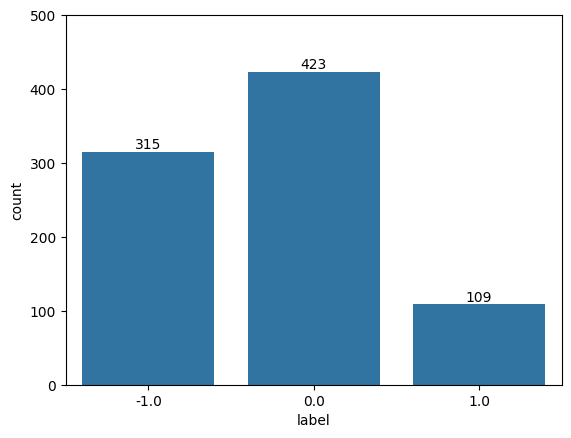

In [10]:
# count the number of each label in the dataset
ax = sns.countplot(data=data, x='label')
for container in ax.containers:
    ax.bar_label(container)

ax.set_ylim(0, 500)


I'm quite curious about the relationship about `sentiment` vs `label`. Let's visualize it.

**Insight**: 
- The dataset is heavily skewed towards the 0.0 label, which is predominantly marked with a neutral sentiment (0.0).

- The −1.0 label shows the most balanced sentiment distribution, with negative, neutral, and positive counts being relatively close.

- The 1.0 label has the lowest sample count overall, but positive sentiment (1.0) is clearly the dominant sentiment within that specific group.

<Axes: xlabel='label', ylabel='count'>

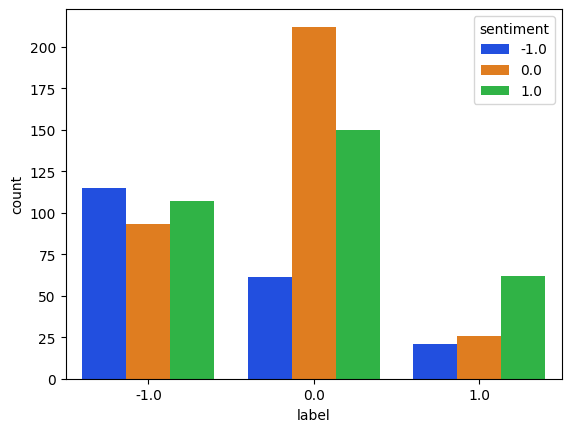

In [ ]:
sentiment_counts = data.groupby(['label', 'sentiment']).size().reset_index(name='count')
label_totals = data.groupby('label').size().reset_index(name='label_total')


sns.countplot(data=data, x='label', hue='sentiment', palette='bright')

**Curiousity**: Which board (subreddit) has the most extreme emotions? 

**Insights**:
- **Overall Neutrality**: The median polarity for all 4 subreddits is very close to 0.0 (neutral). This suggests that most posts across these communities are factual or moderate in emotional tone.

- **Lowest Volatility in Advice**: *stockstobuytoday* has the narrowest box, meaning its sentiment is the most concentrated and stable. Posts here are generally focused and slightly positive.

- **Highest Emotional Range**: *wallstreetbets* shows the widest box, indicating the greatest variation in sentiment. This confirms its reputation for posts that swing more often between strong optimism and pessimism.

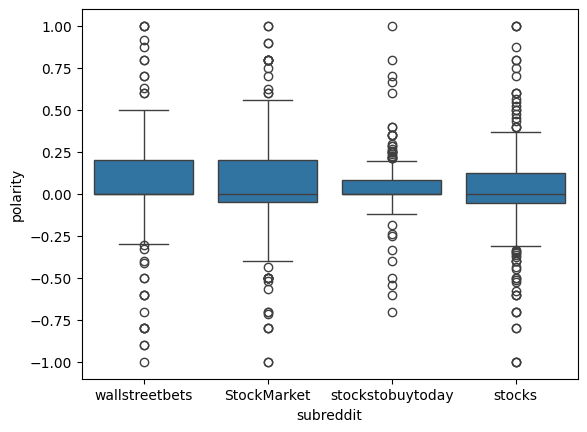

In [20]:
sns.boxplot(data = data, x = 'subreddit', y = 'polarity');

**Curiousity**: Will the negative or positive sentiment of the posts or comments get more upvotes?

**Insights**:
- **Highest Virality in Label 1.0**: The single most popular post (highest upvotes, near 4,000) belongs to Label 1.0. This suggests that posts in this category have the highest potential to go super-viral.

- **Steady Popularity in Label 0.0**: Posts with Label 0.0 consistently reach mid-to-high upvote counts (up to about 1,100), making it a stable source of moderately popular content.

- **Limited Reach for Label -1.0**: Content categorized as Label −1.0 rarely breaks past ≈500 upvotes, indicating that negative or "−1.0" content generally struggles to achieve widespread popularity.

<Axes: xlabel='label', ylabel='upvotes'>

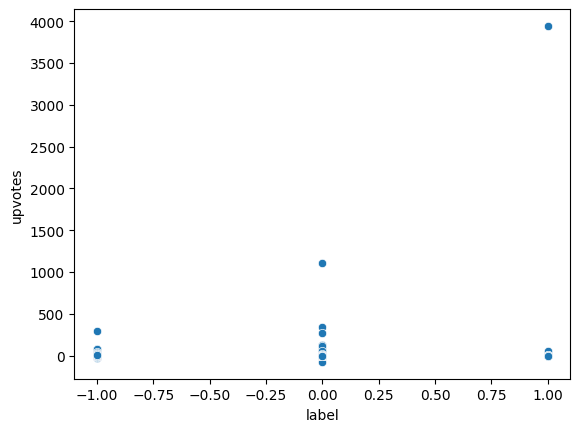

In [23]:
sns.scatterplot(data = data, x = 'label', y = 'upvotes')

## Processing Text

For simply, let's generate a new data frame with only `text`.

In [26]:
text_df = data[['text']]
text_df

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.
3,Vision Marine Technologies Inc. is rewriting t...
4,He didn’t say thank you.
...,...
842,Invest now it is going to shoot up tomorrow
843,Where can I read this?
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re..."
845,i sold my puts so i expect cheeto to declare w...


Let's seperate the text into unigrams.

In [28]:
text_df['unigrams'] = text_df['text'].apply(lambda x: list(nltk.word_tokenize(x)))
text_df

C:\Users\user\AppData\Local\Temp\ipykernel_15948\757785677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['unigrams'] = text_df['text'].apply(lambda x: list(nltk.word_tokenize(x)))


,text,unigrams
0,Calls on retards,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,"[He, didn, ’, t, say, thank, you, .]"
...,...,...
842,Invest now it is going to shoot up tomorrow,"[Invest, now, it, is, going, to, shoot, up, to..."
843,Where can I read this?,"[Where, can, I, read, this, ?]"
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...","[Upgrades, ,, Downgrades, [, Stock, Analyst, R..."
845,i sold my puts so i expect cheeto to declare w...,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


Use `CountVectorizer` to convert the text data into a sparse matrix of token counts.

In [ ]:
# Transform the araticles into a document-term matrix using CountVectorizer

count_vect = CountVectorizer()
counts = count_vect.fit_transform(text_df.text) #learn the vocabulary and return document-term matrix
print(counts[0])
print(f'\nWord 692 :', count_vect.get_feature_names_out()[692])
print(f'Word 2706:', count_vect.get_feature_names_out()[2706])
print(f'Word 3248:', count_vect.get_feature_names_out()[3248])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1

Word 692 : calls
Word 2706: on
Word 3248: retards


In [37]:
counts.shape

(847, 4346)

Let's draw some plots to visualize the term frequency of each word in the corpus.

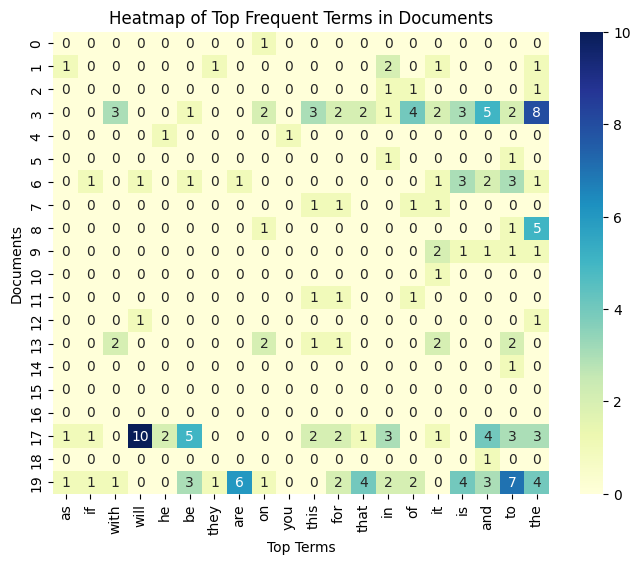

In [ ]:
# For better visualization, 
# let's sort the words by their frequency first.
tdm = counts.toarray()

term_freq = np.array(tdm.sum(axis=0))
top_indices = term_freq.argsort()[-20:]  # top 10 terms
tdm_top = tdm[:20, top_indices]
terms = np.array(count_vect.get_feature_names_out())
terms_top = terms[top_indices]

# Draw heatplot
plt.figure(figsize=(8, 6))
sns.heatmap(tdm_top, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap of Top Frequent Terms in Documents")
plt.xlabel("Top Terms")
plt.ylabel("Documents")
plt.xticks(np.arange(len(terms_top))+0.5, terms_top, rotation=90)
plt.show()

In [55]:
# Reverse the order to see the most common terms first
top_indices = top_indices[::-1]
terms = count_vect.get_feature_names_out()[top_indices]
freqs = term_freq[top_indices]

# Create bar chart
fig = px.bar(
    x=terms,
    y=freqs,
    labels={'x': 'Terms', 'y': 'Frequencies'},
    title="Most Common 20 Term Frequencies"
)

fig.update_layout(
    width=2000,
    height=600
)

fig.show()

In [56]:
# The log distribution
# Create bar chart
fig = px.bar(
    x=terms,
    y=np.log(freqs),
    labels={'x': 'Terms', 'y': 'Frequencies'},
    title="Most Common 20 Term Frequencies"
)

fig.update_layout(
    width=2000,
    height=600
)

fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here